<a href="https://colab.research.google.com/github/UliksSekiraqa/StockMarketAnalysis/blob/master/AlphaVantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installs/Imports

In [ ]:
!pip install alpha_vantage

In [ ]:
#Running Python 3.6.9

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries

     |████████████████████████████████| 1.2MB 4.0MB/s 
     |████████████████████████████████| 153kB 14.9MB/s 
     |████████████████████████████████| 256kB 15.2MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=85cf77a97518abd03ec1da177bf125243e1268d4c930691352d695bd33f4a2db
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=7eb6abbf66144589c156a84d0edbad0d0140c16e1ff5f43ccf2286bbc3b88d16
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


##Scraping Stock Market Data With Alpha Vantage

In [ ]:
KEY = 'ALTGA3K77UQA49VX'

In [ ]:
  
'''
This method fetch real-time and historical stock prices for an equity from AlphaVantage API.
Return daily split/dividend-adjusted close for the equity from from Nov 1st, 2019 to Jun 30th, 2020.
Keyword Arguments:
    symbol: the symbol for the equity we want to get its data
'''
def get_from_alpha_vantage(company_symbol:str):
    # fetch historical stock prices from AlphaVantage
    # outputsize='full' returns the full-length daily times series, commonly above 1MB
    ts = TimeSeries(key=KEY, output_format='pandas', indexing_type='date')
    data, meta_data = ts.get_daily_adjusted(symbol=company_symbol, outputsize='full')

    # select data from Nov 1st, 2019 to Jun 30th, 2020
    start_date = datetime.datetime(2019, 11, 1)
    end_date = datetime.datetime(2020, 6, 30)
    filtered_data = data.loc[data.index.values >= np.datetime64(start_date)]
    filtered_data = filtered_data.loc[filtered_data.index.values <= np.datetime64(end_date)]
    
    # only select adjusted close from given attributes
    filtered_data = filtered_data[['5. adjusted close']]
    filtered_data.columns = ['adj_close']

    return filtered_data

In [ ]:
#Retrieving data for American firms
JPM = get_from_alpha_vantage('JPM')
AXP = get_from_alpha_vantage('AXP')
WFC = get_from_alpha_vantage('WFC')
MS = get_from_alpha_vantage('MS')

In [ ]:
#Retrieving data for British firms
HSBA = get_from_alpha_vantage('LON:HSBA')
BNC = get_from_alpha_vantage('LON:BNC')
LLOY = get_from_alpha_vantage('LON:LLOY')
RBS = get_from_alpha_vantage('LON:RBS')

In [ ]:
#Checking for inconsistencies in the datasets sizes
print(len(JPM))
print(len(AXP))
print(len(WFC))
print(len(MS))
print(len(HSBA))
print(len(BNC))
print(len(LLOY))
print(len(RBS))

166
166
166
166
166
166
166
166


In [ ]:
#Checking to see if any values are null
print(JPM.isnull().values.any())
print(AXP.isnull().values.any())
print(WFC.isnull().values.any())
print(MS.isnull().values.any())
print(HSBA.isnull().values.any())
print(BNC.isnull().values.any())
print(LLOY.isnull().values.any())
print(RBS.isnull().values.any())

False
False
False
False
False
False
False
False


##Analysing/Visualising Stock Market Data



In [ ]:
#Compile stocks into a csv file
equities_names = ['JPM','AXP','WFC','MS','LON:HSBA','LON:BNC','LON:LLOY','LON:RBS']
equities = pd.DataFrame(index=JPM.index.values, columns=equities_names)

equities['JPM'] = JPM.values
equities['AXP'] = AXP.values
equities['WFC'] = WFC.values
equities['MS'] = MS.values
equities['LON:HSBA'] = HSBA.values
equities['LON:BNC'] = BNC.values
equities['LON:LLOY'] = LLOY.values
equities['LON:RBS'] = RBS.values

equities.to_csv('avData.csv')

,JPM,AXP,WFC,MS,LON:HSBA,LON:BNC,LON:LLOY,LON:RBS,HSBA,BNC,LLOY,RBS
2020-06-30,93.1552,94.7667,25.6000,48.3000,NaN,NaN,NaN,NaN,378.6000,202.9000,31.1750,121.6000
2020-06-29,92.1054,94.0898,25.7000,47.2400,NaN,NaN,NaN,NaN,384.8000,204.4500,31.2550,121.2000
2020-06-26,91.6993,92.9948,25.3400,47.0500,NaN,NaN,NaN,NaN,380.2500,196.1400,31.0850,118.5000
2020-06-25,97.0177,97.4047,27.3700,48.7900,NaN,NaN,NaN,NaN,384.3500,191.8200,31.6200,120.2000
2020-06-24,93.7494,95.0454,26.1200,46.9500,NaN,NaN,NaN,NaN,380.8000,195.0000,31.6100,119.7000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-07,126.5621,119.6458,52.3734,47.9343,NaN,NaN,NaN,NaN,578.0670,313.7567,52.8732,207.8133
2019-11-06,125.8806,118.0772,51.6912,47.8358,NaN,NaN,NaN,NaN,575.4692,305.1147,53.0673,208.1987
2019-11-05,125.6859,117.1696,51.2108,48.0230,NaN,NaN,NaN,NaN,575.2768,307.5232,53.6959,208.5841
2019-11-04,125.4133,118.0082,50.6535,48.1018,NaN,NaN,NaN,NaN,573.4486,312.2928,53.4186,208.7768


In [ ]:
# Load AlphaVantage data from csv file
df = pd.read_csv('avData.csv', index_col=0)
new_names = {"LON:HSBA":"HSBA","LON:BNC":"BNC","LON:LLOY":"LLOY","LON:RBS":"RBS"}
df.rename(columns=new_names, inplace=True)

# sort the rows in ascending dates
df = df.sort_index(axis=0, ascending=True)
df

,JPM,AXP,WFC,MS,HSBA,BNC,LLOY,RBS
2019-11-01,124.4202,117.5347,50.1347,46.6241,566.5211,294.9616,52.9749,206.8499
2019-11-04,125.4133,118.0082,50.6535,48.1018,573.4486,312.2928,53.4186,208.7768
2019-11-05,125.6859,117.1696,51.2108,48.0230,575.2768,307.5232,53.6959,208.5841
2019-11-06,125.8806,118.0772,51.6912,47.8358,575.4692,305.1147,53.0673,208.1987
2019-11-07,126.5621,119.6458,52.3734,47.9343,578.0670,313.7567,52.8732,207.8133
...,...,...,...,...,...,...,...,...
2020-06-24,93.7494,95.0454,26.1200,46.9500,380.8000,195.0000,31.6100,119.7000
2020-06-25,97.0177,97.4047,27.3700,48.7900,384.3500,191.8200,31.6200,120.2000
2020-06-26,91.6993,92.9948,25.3400,47.0500,380.2500,196.1400,31.0850,118.5000
2020-06-29,92.1054,94.0898,25.7000,47.2400,384.8000,204.4500,31.2550,121.2000


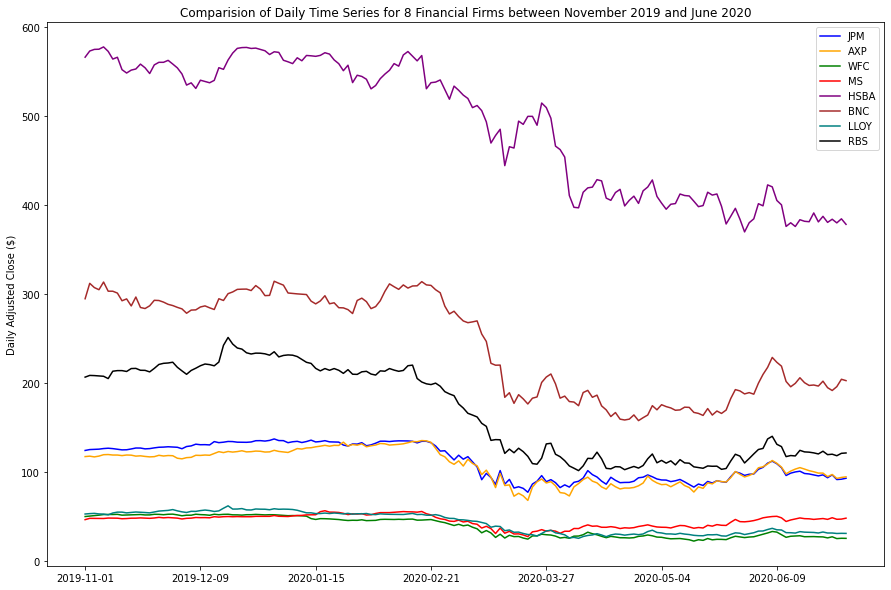

In [ ]:
#Plotting graphs
graph_colors = ['blue','orange','green','red','purple','brown','teal','black']
ax1 = df.plot.line(figsize=(15,10),color=graph_colors)
ax1.set_ylabel("Daily Adjusted Close ($)")
plt.title("Comparision of Daily Time Series for 8 Financial Firms between November 2019 and June 2020")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb46ae43ac8>,
      dtype=object)

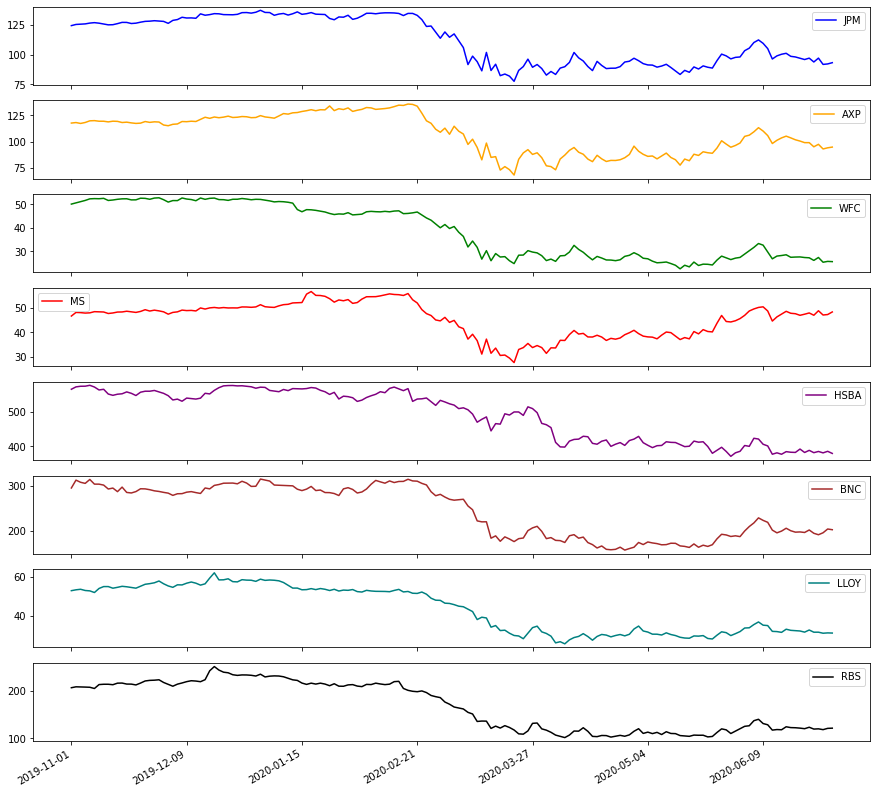

In [ ]:
df.plot.line(subplots=True, figsize=(15,15), color=graph_colors)